# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [57]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import Binarizer

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [14]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

C:\Users\talt\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:27: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


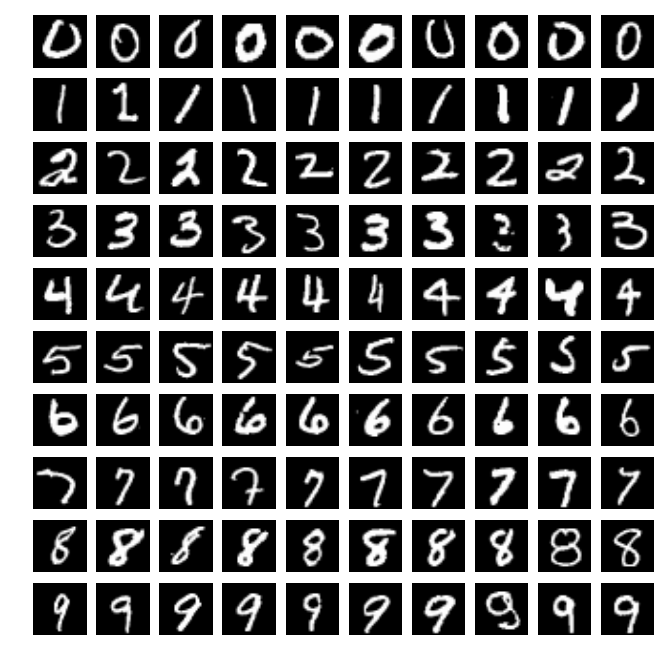

In [18]:
def P1(num_examples=10):

### STUDENT START ###

# Plot figure with gray colormap
    plt.rc('image', cmap='gray')
    plt.rc('figure', figsize=[8,8])
    fig = plt.figure()

# List with indices of data with labels 0 through 9
    gridsize = 10
    gridsq = gridsize * gridsize
    indexdata = np.empty(gridsq)

    for i in range(0, gridsize):
        count = 0
        while(count < gridsize):
            r = np.random.randint(0, 60000)
            if ((int(train_labels[r])) == i):
                indexdata[((i*10)+count)]=r
                count=count+1

# Plot a 10 X 10 grid with images
    for i in range(0, gridsq):
        ax = plt.subplot(gridsize, gridsize, i+1) 
        ax.set_axis_off()
        mat = np.reshape(train_data[(indexdata[i])], (28, 28))
        ax.imshow(mat)
    plt.show()

### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [20]:
def P2(k_values):

### STUDENT START ###

#Set the initial k values
# using the order 9, 7, 5, 3, 1, so the accuracies from k=1 can be used in P3
    kparams=[9,7,5,3,1]

# execute the nearest neighbor classifier
    for k in kparams:
        clf = KNeighborsClassifier(k)
        # Train with 1000 records of data
        clf.fit(mini_train_data, mini_train_labels)
        # Making predictions 
        prediction = clf.predict(dev_data)
        # Comparing predicted labels with actual labels
        accuracy=clf.score(dev_data, dev_labels)
        print ("Predicted Nearest Neighbor accuracy for k value of "+str(k)+" is "+str(accuracy))

    print("Classification report for classifier %s:\n%s\n"% (clf, classification_report(dev_labels, prediction)))
    
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

Predicted Nearest Neighbor accuracy for k value of 9 is 0.86
Predicted Nearest Neighbor accuracy for k value of 7 is 0.871
Predicted Nearest Neighbor accuracy for k value of 5 is 0.867
Predicted Nearest Neighbor accuracy for k value of 3 is 0.876
Predicted Nearest Neighbor accuracy for k value of 1 is 0.892
Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'):
             precision    recall  f1-score   support

        0.0       0.93      0.97      0.95        91
        1.0       0.90      0.98      0.94       133
        2.0       0.94      0.91      0.93       111
        3.0       0.85      0.90      0.88        98
        4.0       0.92      0.87      0.89       107
        5.0       0.83      0.76      0.79        78
        6.0       0.94      0.93      0.94       101
        7.0       0.91      0.92      0.91        98
        8.0

ANSWER: The digit with the lowest F-1 score is "9", making it the most difficult to classify using next-nearest neighbor analysis.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [33]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
    accuracies = []
    accuracylist = []
    clf = KNeighborsClassifier(1)
    
    for train_size in train_sizes:
        # Train the model with the training data set 
        shuffle = np.random.permutation(np.arange(train_data.shape[0]))
        p3_data, p3_label = train_data[shuffle], train_labels[shuffle]

        p3_data, p3_label = p3_data[:train_size], p3_label[:train_size]
    
        starttime = time.time()
        clf.fit(p3_data, p3_label)
        # Make predictions for the data in dev dataset 
        prediction = clf.predict(dev_data)
        endtime = time.time()
        # Compare predicted labels with actual labels
        accuracy = clf.score(dev_data, dev_labels)
        accuracies.append(accuracy)
        accuracylist.append(accuracy)
        print ("Predicted Nearest Neighbor accuracy for a training size of "+str(train_size)+" records is "+str(accuracy))
        print ("Time needed for prediction for a training size of "+str(train_size)+" records is "+str(endtime-starttime)+" seconds")
        print (accuracylist)
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
P3(train_sizes, accuracies)

Predicted Nearest Neighbor accuracy for a training size of 100 records is 0.695
Time needed for prediction for a training size of 100 records is 0.10900616645812988 seconds
[0.69499999999999995]
Predicted Nearest Neighbor accuracy for a training size of 200 records is 0.777
Time needed for prediction for a training size of 200 records is 0.25301456451416016 seconds
[0.69499999999999995, 0.77700000000000002]
Predicted Nearest Neighbor accuracy for a training size of 400 records is 0.817
Time needed for prediction for a training size of 400 records is 0.5600318908691406 seconds
[0.69499999999999995, 0.77700000000000002, 0.81699999999999995]
Predicted Nearest Neighbor accuracy for a training size of 800 records is 0.877
Time needed for prediction for a training size of 800 records is 1.2470712661743164 seconds
[0.69499999999999995, 0.77700000000000002, 0.81699999999999995, 0.877]
Predicted Nearest Neighbor accuracy for a training size of 1600 records is 0.9
Time needed for prediction for 

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [34]:
def P4():

### STUDENT START ###
#Fit a linear regression model 
#Use accuracies from Question 3 from the notebook paragraph above
    XX = [[100],[200],[400],[800],[1600],[3200],[6400],[12800],[25000]]
    regr = LinearRegression(normalize=True)
    regr.fit(XX,accuracies)

    X_test = [[60000]]
    print(regr.predict(X_test))    

### STUDENT END ###

accuracies = [0.70799999999999996, 0.80200000000000005, 0.83199999999999996, 0.871, 0.90100000000000002, 0.92700000000000005, 0.94399999999999995, 0.96199999999999997, 0.96199999999999997]
P4()

[ 1.2376605]


ANSWER: This model predicts an accuracy of 1.24, or 124%.  This is troublesome since the value exceeds 100%.  A transformation would need to be made in order to have a valid accuracy, such as a constraining transformaion (y = 1/(1-x)).

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

CONFUSION MATRIX
[[ 88   0   1   0   0   1   1   0   0   0]
 [  0 131   1   1   0   0   0   0   0   0]
 [  1   2 101   2   0   1   0   2   2   0]
 [  1   1   1  88   0   3   1   0   2   1]
 [  0   1   0   0  93   0   0   1   0  12]
 [  2   2   1   7   0  59   1   0   1   5]
 [  2   2   0   0   1   1  94   0   1   0]
 [  1   2   0   0   1   0   0  90   0   4]
 [  0   4   1   3   2   5   3   0  77   2]
 [  0   1   1   2   4   1   0   6   0  71]]


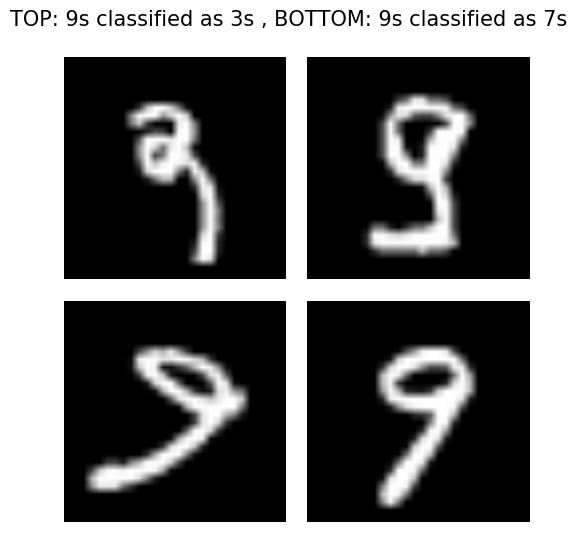

In [37]:
def P5():

### STUDENT START ###

    # Fit model and get predictions
    _m = KNeighborsClassifier(n_neighbors=1)
    _m.fit(mini_train_data, mini_train_labels)
    _p = _m.predict(dev_data)

    # Print confusion matrix
    print ('CONFUSION MATRIX')
    print (confusion_matrix(y_true=dev_labels, y_pred=_p, labels= range(10)))    

    # Print examples of mislabeled 9s (two 9s as 3s and two 9s as 7s)
    fig, ax = plt.subplots(2, 2, figsize=(6,6))
    
    _num_as3, _num_as7 = 0, 0 # aux for keeping track of examples plotted
    
    for i, label in enumerate(dev_labels):
        if label == 9:
            
            # If 9 mislabeled as 3
            if _p[i] == 3 and _num_as3 < 2:
                ax[0,_num_as3].imshow(dev_data[i].reshape(28,28), cmap=plt.cm.gray)
                ax[0,_num_as3].axis('off')
                _num_as3 += 1

            # If 9 mislabeled as 7
            if _p[i] == 7 and _num_as7 < 2:
                ax[1,_num_as7].imshow(dev_data[i].reshape(28,28), cmap=plt.cm.gray)
                ax[1,_num_as7].axis('off')
                _num_as7 += 1
            
            if _num_as3 + _num_as7 >= 4:
                break

    fig.suptitle('TOP: 9s classified as 3s , BOTTOM: 9s classified as 7s', size=15)
    fig.subplots_adjust(wspace=.1, hspace=.1)
    
### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [52]:
# Write a function that returns a vector with blurred values given a regular vector of size 784
#    Implement a simplified Gaussian blur by just using the 8 neighboring pixels: 
#    the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values
# For example for a pixel at position (3,3) the pixel values from [(2,2),(2,3),(2,4),(3,2),(3,3),(3,4),(4,2),(4,3),(4,4)]
def funcgaussianblur(datavector):
    # Reshape the vector in to a 28 X 28 matrix
    datamat = np.reshape(datavector, (28, 28))
    blurdatamat = np.reshape(datavector, (28, 28))
    # Cycle through the data - by the rows
    for rowindex in range(0,27):
        for colindex in range(0,27):
            val = 0
            n = 0
            # Get the values from the previous row
            if (rowindex-1)>=0:
                if(colindex-1)>=0:
                    val = val + datamat[rowindex-1][colindex-1]
                    n=n+1
                val = val + datamat[rowindex-1][colindex]
                n=n+1
                if(colindex+1)<=27:
                    val = val + datamat[rowindex-1][colindex+1]
                    n=n+1
            # Add the values from the current row
            if(colindex-1)>=0:
                val = val + datamat[rowindex][colindex-1]
                n=n+1
            val = val + datamat[rowindex][colindex]
            n=n+1
            if(colindex+1)<=27:
                val = val + datamat[rowindex][colindex+1]
                n=n+1
            # Get the values from the next row
            if (rowindex+1)<=27:
                if(colindex-1)>=0:
                    val = val + datamat[rowindex+1][colindex-1]
                    n=n+1
                val = val + datamat[rowindex+1][colindex]
                n=n+1
                if(colindex+1)<=27:
                    val = val + datamat[rowindex+1][colindex+1]
                    n=n+1
            # Compute the blurred data value
            blurdatamat[rowindex][colindex] = val/n
    # Reshape the 28 X 28 matrix back to a vector of size 784
    blurdatavector = np.reshape(blurdatamat, (1, 784))
    return blurdatavector
  
#preprocess the training data
blurtrain_data = train_data
for i in range(0, train_data.shape[0]):
    blurtrain_data[i] = funcgaussianblur(train_data[i])

clf = KNeighborsClassifier()
clf.fit(blurtrain_data, train_labels)
# Make predictions for the data in dev dataset 
prediction = clf.predict(dev_data)
    
# Compare predicted labels with actual labels
accuracy = clf.score(dev_data, dev_labels)
print ("Predicted Nearest Neighbor accuracy with preprocessing just training data is "+str(accuracy))

#preprocess the dev data
blurdev_data = dev_data
for i in range(0, dev_data.shape[0]):
    blurdev_data[i] = funcgaussianblur(dev_data[i])

clf = KNeighborsClassifier()
clf.fit(train_data, train_labels)
# Make predictions for the data in dev dataset 
prediction = clf.predict(blurdev_data)
    
# Compare predicted labels with actual labels
accuracy = clf.score(blurdev_data, dev_labels)
print ("Predicted Nearest Neighbor accuracy with preprocessing just dev data is "+str(accuracy))

#preprocess both dev and training data
clf = KNeighborsClassifier()
clf.fit(blurtrain_data, train_labels)
# Make predictions for the data in dev dataset 
prediction = clf.predict(blurdev_data)
    
# Compare predicted labels with actual labels
accuracy = clf.score(blurdev_data, dev_labels)
print ("Predicted Nearest Neighbor accuracy with preprocessing both training and dev data is "+str(accuracy))

### STUDENT END ###

P6()

Predicted Nearest Neighbor accuracy with preprocessing just training data is 0.981
Predicted Nearest Neighbor accuracy with preprocessing just dev data is 0.983
Predicted Nearest Neighbor accuracy with preprocessing both training and dev data is 0.983


NameError: name 'xrange' is not defined

ANSWER: (Copied from above)
Predicted Nearest Neighbor accuracy with preprocessing just training data is 0.981
Predicted Nearest Neighbor accuracy with preprocessing just dev data is 0.983
Predicted Nearest Neighbor accuracy with preprocessing both training and dev data is 0.983

While this took a very long time to calculate, the accuracy for preprocessing (1) only the development data and (2) both training and development data were the same.  For the sake of time in processing, it would be inefficient to preprocess both datasets.  It would seem from this example that preprocessing only the development data would suffice.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [75]:
def P7():

    ### STUDENT START : ###
    # BernoulliNB
    # Mapping the pixel values to either 0 or 1; If the value is less than 0.1 then use 0, else 1
    BNBtrain_data = Binarizer(0.1).transform(train_data)
    BNBdev_data = Binarizer(0.1).transform(dev_data)
    BNBclf = BernoulliNB()
    # Train the classifier with the training data
    BNBclf.fit(BNBtrain_data, train_labels)
    BNBprediction = BNBclf.predict(BNBdev_data)
    # Compare predicted labels with actual labels
    BNBaccuracy = BNBclf.score(BNBdev_data, dev_labels)
    print("Predicted accuracy for BernoulliNB is "+str(BNBaccuracy))

    # MultinomialNB
    # Mapping the pixel values to 0, 1 or 2; If the value is less than 0.1 then use 0, if the value is betwen 0.1 and 0.9 use 1 else 2
    MNBtrain_data = train_data
    binplace = np.digitize(MNBtrain_data, bins=[0.1, 0.9, 1.0])
    MNBtrain_data[np.where(binplace == 1)] = 0
    MNBtrain_data[np.where(binplace == 2)] = 1
    MNBtrain_data[np.where(binplace == 3)] = 2

    MNBdev_data = dev_data
    binplace1 = np.digitize(MNBdev_data, bins=[0.1, 0.9, 1.0])
    MNBdev_data[np.where(binplace1 == 1)] = 0
    MNBdev_data[np.where(binplace1 == 2)] = 1
    MNBdev_data[np.where(binplace1 == 3)] = 2

    # Train the classifier with the training data
    MNBclf = MultinomialNB()
    MNBclf.fit(MNBtrain_data, train_labels)
    MNBprediction = MNBclf.predict(MNBdev_data)
    # Compare predicted labels with actual labels
    MNBaccuracy = MNBclf.score(MNBdev_data, dev_labels)
    print("Predicted accuracy for MultinomialNB is "+str(MNBaccuracy))

    ### STUDENT END ###

P7()

Predicted accuracy for BernoulliNB is 0.37
Predicted accuracy for MultinomialNB is 0.421


ANSWER:  The predicted accuracy for pixel values of 0 or 1 is 0.37.  If we extend this to 0, 1, and 2, the accuracy increases to 0.421.  This is the expected result, since adding sensitivity to the images increases accuracy as we have seen above.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [67]:
def P8(alphas):

### STUDENT START ###
    
    nb = BernoulliNB(binarize = .5, fit_prior=False) # initialize estimator
    gr_srch = GridSearchCV(nb, alphas)
    gr_srch.fit(mini_train_data, mini_train_labels) # fit grid search
    
    return gr_srch

### STUDENT END ###

alphas = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

## Report accuracies and scores for each alpha specified
print ('ALPHA   AVG-Score    SCORES')
for row in nb.grid_scores_:
    print ("{0[alpha]:<6}   {1:5.1%}   [ {2[0]:5.1%}, {2[1]:5.1%}, {2[2]:5.1%} ]".format(*row))

ALPHA   AVG-Score    SCORES
0.0001   29.2%   [ 25.5%, 36.3%, 25.8% ]
0.001    29.6%   [ 25.8%, 36.6%, 26.4% ]
0.01     30.1%   [ 26.1%, 36.9%, 27.3% ]
0.1      29.9%   [ 25.2%, 37.5%, 27.0% ]
0.5      31.8%   [ 27.9%, 37.5%, 30.0% ]
1.0      29.1%   [ 27.3%, 33.6%, 26.4% ]
2.0      27.0%   [ 25.8%, 30.6%, 24.5% ]
10.0     17.6%   [ 15.7%, 19.5%, 17.6% ]


In [68]:
alphas = {'alpha': [0.0]}
P8(alphas)
print ('ALPHA   AVG-Score    SCORES')
for row in nb.grid_scores_:
    print ("{0[alpha]:<6}   {1:5.1%}   [ {2[0]:5.1%}, {2[1]:5.1%}, {2[2]:5.1%} ]".format(*row))

ALPHA   AVG-Score    SCORES
0.0001   29.2%   [ 25.5%, 36.3%, 25.8% ]
0.001    29.6%   [ 25.8%, 36.6%, 26.4% ]
0.01     30.1%   [ 26.1%, 36.9%, 27.3% ]
0.1      29.9%   [ 25.2%, 37.5%, 27.0% ]
0.5      31.8%   [ 27.9%, 37.5%, 30.0% ]
1.0      29.1%   [ 27.3%, 33.6%, 26.4% ]
2.0      27.0%   [ 25.8%, 30.6%, 24.5% ]
10.0     17.6%   [ 15.7%, 19.5%, 17.6% ]


C:\Users\talt\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
C:\Users\talt\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
C:\Users\talt\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
C:\Users\talt\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:766: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)


In [69]:
print (nb.best_params_)

{'alpha': 0.5}


ANSWER: The best alpha is 0.5.  I'm not sure about the alpha that is equal to zero.  While the average scores as alpha _approaches_ zero somewhat trend higher and higher, a numberical alpha that equals zero does not fit this pattern.  Since there are "divice by zero" errors, the computation cannot be accurate with a zero value, and therefore the accuracy score cannot be trusted for this value.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [70]:
def P9():   

    ### STUDENT START ###
    GNBclf = GaussianNB()
    param = GNBclf.fit(train_data, train_labels)
    GNBprediction1 = GNBclf.predict(dev_data)
    # Compare predicted labels with actual labels
    GNBaccuracy1 = GNBclf.score(dev_data, dev_labels)
    print("Predicted accuracy for GaussianNB is "+str(GNBaccuracy1))
    #print("theta", GNBclf.theta_[np.argmax(GNBclf.theta_)])
    #print("sigma", GNBclf.sigma_)
    #print(GNBclf.sigma_.shape)

    import sklearn.preprocessing as pp

    scaledtrain_data = pp.normalize(train_data)
    scaleddev_data = pp.normalize(dev_data)
    GNBclf.fit(scaledtrain_data, train_labels)
    GNBprediction2 = GNBclf.predict(scaleddev_data)
    GNBaccuracy2 = GNBclf.score(scaleddev_data, dev_labels)
    print("Predicted accuracy for GaussianNB with normalization is "+str(GNBaccuracy2))

    ### STUDENT END ###

P9()

Predicted accuracy for GaussianNB is 0.532
Predicted accuracy for GaussianNB with normalization is 0.402


ANSWER:

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

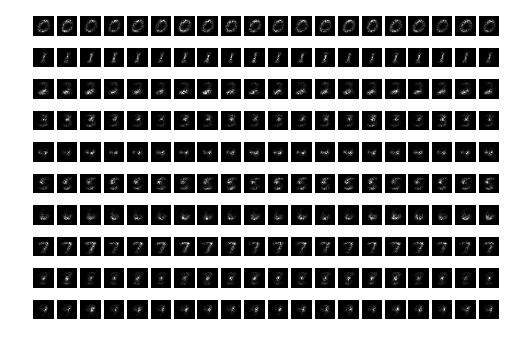

In [73]:
def P10(num_examples):

    ### STUDENT START ###
    # Training the BernoulliNB classifier with training data
    BNBtrain_data = Binarizer(0.1).transform(train_data)
    BNBdev_data = Binarizer(0.1).transform(dev_data)
    BNBclf = BernoulliNB()
    # Make predictions
    BNBclf.fit(BNBtrain_data, train_labels)

    # Generate image data based on the trained data
    num_features = 784
    # Number of samples per digit
    num_samples = 20
    # Number of digits
    num_digits = 10
    # Initialize a ndarray with zeroes
    gen_data = np.zeros(((num_samples*num_digits), num_features))

    # For each digit 0 through 9
    for digit in range (0, num_digits):
        # Generate image data for 20 samples
        for sample in range (0, num_samples):
            # Generate the 784 feature values
            for feature in range (0, num_features):
                continuewithfeature = True
                # Get the estimated probability of each pixel
                prob = np.exp(BNBclf.feature_log_prob_[digit][feature])
                while(continuewithfeature):
                    # The feature data is randomly generated
                    r = np.random.rand()
                    # As long as the random value is less than the estimated probability of each pixel, then use it
                    # Otherwise generate another one
                    if(r < prob):
                        gen_data[((digit*num_samples)+sample)][feature] = r
                        continuewithfeature = False
            # Plot the data  with the generated dataset
            ax = plt.subplot(num_digits, num_samples, (((digit*num_samples)+sample)+1))
            ax.set_axis_off()
            mat = np.reshape(gen_data[((digit*num_samples)+sample)], (28, 28))
            ax.imshow(mat)

    ### STUDENT END ###

P10(20)

ANSWER: The trained digits look more blurry and less continuous than the training digits, especially in the digits like 8 and 9.  From above, the digit 9 has the lowest accuracy score, so this cloudiness would make sense.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [82]:
def P11(buckets, correct, total):
    
### STUDENT START ###

    # Fit BernoulliNB model with alpha=0.01 (as per P8's response)
    bnb = BernoulliNB(alpha=0.01, binarize=.5, fit_prior=False)
    bnb.fit( mini_train_data , mini_train_labels)
    _pred_prob = np.exp( bnb.predict_log_proba(dev_data) )
    
    # Get predicted probabilities and labels
    posterior_prob = np.max(_pred_prob, axis=1)
    predicted_label = np.argmax(_pred_prob, axis=1)
        
    # Update total and correct counts accordingly
    for i, p in enumerate(posterior_prob):  # for each prediction
        for j, b in enumerate(buckets):  # for each posterior bucket
            if p >= b:
                # add to total count
                total[j] += 1
                # check if correct
                if predicted_label[i] == dev_labels[i]:
                    correct[j] += 1
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

print ('  POSTERIOR BUCKET    Accuracy  Total  Correct')
for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = 1. * correct[i] / total[i]
    print ('P <= {:<15.13}    {:>5.1%}    {:>4d}      {:>3d}'.format(buckets[i],accuracy, total[i], correct[i]))

  POSTERIOR BUCKET    Accuracy  Total  Correct
P <= 0.5                47.5%     474      225
P <= 0.9                59.1%     281      166
P <= 0.999              67.1%     155      104
P <= 0.99999            73.1%     108       79
P <= 0.9999999          83.5%      79       66
P <= 0.999999999        80.3%      61       49
P <= 0.99999999999      82.0%      50       41
P <= 0.9999999999999    82.2%      45       37
P <= 1.0                85.7%      42       36


ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()